## 香农熵的代码实现

In [27]:
def calEnt(dataSet):
    n = dataSet.shape[0]                           # 样本量
    iset = dataSet.iloc[:,-1].value_counts()       # 按标签类别计数
    p = iset / n                                   # 不同类别的概率
    ent = (-p*np.log2(p)).sum()                    # 信息熵公式
    return ent

In [28]:
# 创建数据集
import numpy as np
import pandas as pd

def createDataSet():
    row_data = {
        'accompany':[0,0,0,1,1],
        'game':[1,1,0,1,1],
        'bad boy':['yes','yes','no','no','no']
    }
    dataSet = pd.DataFrame(row_data)
    return dataSet

In [29]:
dataSet = createDataSet()
dataSet

,accompany,game,bad boy
0,0,1,yes
1,0,1,yes
2,0,0,no
3,1,1,no
4,1,1,no


In [30]:
calEnt(dataSet)

0.9709505944546686

### 信息增益

In [31]:
a=(3/5)*(-(2/3)*np.log2(2/3)-(1/3)*np.log2(1/3))
calEnt(dataSet)-a

0.4199730940219749

In [32]:
a=(4/5)*(-(2/4)*np.log2(2/4)-(2/4)*np.log2(2/4))
calEnt(dataSet)-a

0.17095059445466854

### 划分数据集

In [33]:
# 选择最优的列进行切分
def bestSplit(dataSet):
    baseEnt = calEnt(dataSet)                                # 计算原始熵
    bestGain = 0                                             # 初始化信息增益
    axis = -1                                                # 初始化最佳切分列，标签列
    for i in range(dataSet.shape[1]-1):                      # 对特征的每一列进行循环
        levels= dataSet.iloc[:,i].value_counts().index       # 提取出当前列的所有取值
        ents = 0                                             # 初始化子节点的信息熵
        for j in levels:                                     # 对当前列的每一个取值进行循环
            childSet = dataSet[dataSet.iloc[:,i]==j]         # 某一个子节点的dataframe
            ent = calEnt(childSet)                           # 计算某一个子节点的信息熵
            ents += (childSet.shape[0]/dataSet.shape[0])*ent # 计算当前列的信息熵
            print(f'第{i}列的信息熵为{ents}')
        infoGain = baseEnt-ents                              # 计算当前列的信息增益
        print(f'第{i}列的信息增益为{infoGain}')
        if (infoGain > bestGain):
            bestGain = infoGain                              # 选择最大信息增益
            axis = i                                         # 最大信息增益所在列的索引
    return axis

In [34]:
bestSplit(dataSet)

第0列的信息熵为0.5509775004326937
第0列的信息熵为0.5509775004326937
第0列的信息增益为0.4199730940219749
第1列的信息熵为0.8
第1列的信息熵为0.8
第1列的信息增益为0.17095059445466854


0

In [35]:
def mySplit(dataSet,axis,value):
    col = dataSet.columns[axis]
    redataSet = dataSet.loc[dataSet[col]==value,:].drop(col,axis=1)
    return redataSet

In [36]:
mySplit(dataSet,0,0)

,game,bad boy
0,1,yes
1,1,yes
2,0,no


In [37]:
def createTree(dataSet):
    featlist = list(dataSet.columns)                        # 提取出数据集所有的列
    classlist = dataSet.iloc[:,-1].value_counts()           # 获取最后一列类标签
    # 判断最多标签数目是否等于数据集行数，或者数据集是否只有一列
    if classlist[0]==dataSet.shape[0] or dataSet.shape[1] == 1:
        return classlist.index[0]                           # 如果是，返回类标签
    axis = bestSplit(dataSet)                               # 确定出当前最佳切分列的索引
    bestfeat = featlist[axis]                               # 获取该索引对应的特征
    myTree = {bestfeat:{}}                                  # 采用字典嵌套的方式存储树信息
    del featlist[axis]                                      # 删除当前特征
    valuelist = set(dataSet.iloc[:,axis])                   # 提取最佳切分列所有属性值
    for value in valuelist:                                 # 对每一个属性值递归建树
        myTree[bestfeat][value] = createTree(mySplit(dataSet,axis,value))
    return myTree

In [38]:
myTree = createTree(dataSet)
myTree

第0列的信息熵为0.5509775004326937
第0列的信息熵为0.5509775004326937
第0列的信息增益为0.4199730940219749
第1列的信息熵为0.8
第1列的信息熵为0.8
第1列的信息增益为0.17095059445466854
第0列的信息熵为0.0
第0列的信息熵为0.0
第0列的信息增益为0.9182958340544896


{'accompany': {0: {'game': {0: 'no', 1: 'yes'}}, 1: 'no'}}

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [40]:
wine = load_wine()

In [41]:
wine.data.shape

(178, 13)

In [42]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [43]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [44]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [45]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3,
                                                random_state=420)

In [46]:
Xtrain.shape

(124, 13)

In [47]:
Xtest.shape

(54, 13)

In [48]:
#from sklearn.tree import DecisionTreeClassifier
# clf = DecisionTreeClssifier()

In [49]:
clf = tree.DecisionTreeClassifier(criterion='gini')
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest) #返回预测的准确度
score

0.9444444444444444

In [50]:
feature_name = [
    '酒精','苹果酸','灰',
    '灰的碱性','镁','总酚',
    '类黄酮','非黄烷类酚类',
    '花青素','颜色强度','色调',
    'od280/od315稀释葡萄酒','脯氨酸'
]

In [52]:
# 特征重要性
clf.feature_importances_

array([0.02195225, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.39557682, 0.        , 0.        , 0.39720941,
       0.02404637, 0.        , 0.16121515])

In [54]:
[*zip(feature_name, clf.feature_importances_)]

[('酒精', 0.02195224501537985),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.3955768217709794),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.39720941385141617),
 ('色调', 0.024046373651715403),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.16121514571050916)]

In [55]:
clf.tree_.node_count # 树的节点个数

13

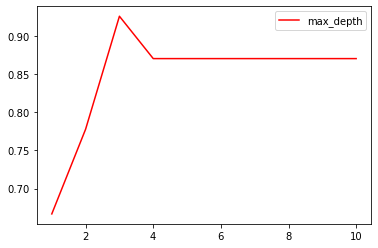

In [56]:
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                      ,criterion="entropy"
                                      ,random_state=30
                                      ,splitter="random"
                                     )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

## 样本不平衡

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs

In [76]:
class_1 = 1000 # 类别1有1000个样本
class_2 = 100  # 类别2有100个样本
centers = [[0,0],[2.0,2.0]]  # 设定两个类别的中心
clusters_std = [2.5, 0.5]    # 设定两个类别的方差，通常来说，样本量比较大的类别会相对松散
X, y = make_blobs(n_samples = [class_1, class_2],
                 centers=centers,
                 cluster_std=clusters_std,
                 random_state=420, shuffle=False)

In [77]:
X

array([[-1.21347713, -4.76288462],
       [-1.31555449, -0.78386505],
       [ 0.82676624,  2.34634311],
       ...,
       [ 2.25807986,  2.46799303],
       [ 2.56312877,  1.6445058 ],
       [ 1.57186015,  1.81496115]])

In [78]:
y

array([0, 0, 0, ..., 1, 1, 1])

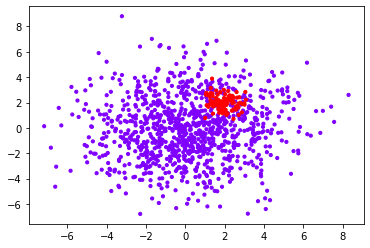

In [79]:
#看看数据集长什么样
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow",s=10);
#其中红色点是少数类，紫色点是多数类

In [80]:
# 划分数据集
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.2,random_state=420)

In [81]:
# 不设定 class_weight
clf = DecisionTreeClassifier()
clf.fit(Xtrain,Ytrain)
clf.predict(Xtest)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [82]:
clf.score(Xtest, Ytest)

0.8954545454545455

In [84]:
# 设定 class_weight
wclf = DecisionTreeClassifier(class_weight={1:50})
wclf.fit(Xtrain, Ytrain)

DecisionTreeClassifier(class_weight={1: 50})

In [85]:
# 给两个模型分别打分，这个分数是 accuracy 准确度
clf.score(Xtest, Ytest)

0.8954545454545455

In [86]:
wclf.score(Xtest, Ytest)

0.9090909090909091

## 混淆矩阵

In [87]:
#所有判断正确并确实为1的样本 / 所有被判断为1的样本
#对于没有class_weight的决策树来说：
Precision_1 = (Ytest[Ytest == clf.predict(Xtest)] == 1).sum()/(clf.predict(Xtest) == 1).sum()
Precision_1

0.6363636363636364

In [88]:
#对于有class_weight的决策树来说：
Precision_2 = (Ytest[Ytest == wclf.predict(Xtest)] == 1).sum()/(wclf.predict(Xtest) == 1).sum()
Precision_2

0.68

In [89]:
#所有predict为1并且正确的点 / 全部为1的点的比例
#对于没有class_weight的决策树来说：
Recall_1 = (Ytest[Ytest == clf.predict(Xtest)] == 1).sum()/(Ytest == 1).sum()
Recall_1

0.4827586206896552

In [90]:
#对于有class_weight的决策树来说：
Recall_2 = (Ytest[Ytest == wclf.predict(Xtest)] == 1).sum()/(Ytest == 1).sum()
Recall_2

0.5862068965517241

In [91]:
F_1 = 2*Precision_1*Recall_1/(Precision_1+Recall_1)
F_1

0.5490196078431373

In [92]:
#对于有class_weight的决策树来说：
F_2 = 2*Precision_2*Recall_2/(Precision_2+Recall_2)
F_2

0.6296296296296295